# The JuSiPy project

In [1]:
import jusipy
import matplotlib.pylab as plt

## Tools and Data

### Land Deals

jusipy provides interfaces for two Land Deal datasets:
* Land Matrix : `jusipy.deals.LandMatrix`
* GRAIN
  * 2016 : `jusipy.deals.GRAIN`
  * 2012 : `jusipy.deals.GRAIN_OLD`

In [2]:
LM  = jusipy.deals.LandMatrix() # LandMatrix
GR  = jusipy.deals.GRAIN()      # GRAIN 2016
#GR2 = jusipy.deals.GRAIN_OLD()  # GRAIN 2012??

These datasets have a uniform interface. Access the raw matrix with `LM.M`.

In [3]:
LM.M[:5]

,deal_id,target_country,location,investor_name,investor_country,intention,negotiation_status,implementation_status,intended_size,contract_size,...,nature_of_the_deal,data_source,contract_farming,crop,negotiation_year,negotiation_agreement,implementation_year,implementation_agreement,target_country_iso3,investor_country_iso3
0,3,Myanmar,"Rakhine, Myanmar",Andhra Pradesh Industrial Infrastructure Corpo...,[India],Food crops,Intended,Project not started,20234.0,NaN,...,Lease / Concession,2008-10-29 http://www.asiantribune.com/?q=node...,NaN,"Onion, Tea, Corn (Maize), Rice, Soya Beans, Su...",2007.0,Expression of interest,NaN,None,MMR,[IND]
1,4,Bangladesh,"Noakhali, Bangladesh",Individual entrepreneurs from Bangladesh,[Bangladesh],Livestock,Concluded,Project not started,5000.0,NaN,...,NaN,2011-11-06 http://www.future-agricultures.org/...,NaN,NaN,2003.0,Oral Agreement,2003.0,None,BGD,[BGD]
2,11,Cambodia,"Ratanakiri Province, Cambodia",30/4 Gialani Company Limited,[Viet Nam],"Agriunspecified, Industry, Livestock",Concluded,None,NaN,9380.0,...,Lease / Concession,2009-01-01 http://www2.gtz.de/wbf/4tDx9kw63gma...,NaN,NaN,2005.0,Contract signed,NaN,None,KHM,[VNM]
3,12,Cambodia,"Kratié, Cambodia",China Asean Resources Ltd.,"[China, Hong Kong Special Administrative Region]","For wood and fibre, Non-food agricultural comm...",Concluded,In operation,NaN,7000.0,...,Lease / Concession,2013-07-08 http://chinaaseanresources.com/2013...,NaN,"Accacia, Rubber",2008.0,Contract signed,2011.0,production,KHM,"[CHN, HKG]"
4,13,Cambodia,"Mondol Kiri, Cambodia",Agro Forestry Research,[China],Non-food agricultural commodities,Concluded,None,NaN,7000.0,...,Lease / Concession,http://www.elc.maff.gov.kh/en/profile/18-mdk/6...,NaN,"Accacia, Rubber",2009.0,Contract signed,NaN,None,KHM,[CHN]


Or query with `dealsFrom` and `dealsTo`.

In [4]:
LM.dealsFrom('DEU').dealsTo('PER')

,deal_id,target_country,location,investor_name,investor_country,intention,negotiation_status,implementation_status,intended_size,contract_size,...,nature_of_the_deal,data_source,contract_farming,crop,negotiation_year,negotiation_agreement,implementation_year,implementation_agreement,target_country_iso3,investor_country_iso3
371,892,Peru,"Ica, Peru","DYER-CORIAT HOLDING, S.L, DEUTSCHE BANK AG, AN...","[Peru, Germany, United States of America, L...",Food crops,Concluded,Startup phase,NaN,3300.0,...,Outright Purchase,2009-01-01 http://www.larevistaagraria.org/sit...,NaN,"Food crops (no specification), Vegetables",2009.0,Contract signed,2008.0,no production,PER,"[PER, DEU, USA, LUX]"
1002,3248,Peru,"Virú, Peru","DYER-CORIAT HOLDING, S.L, DEUTSCHE BANK AG, AN...","[Peru, Germany, United States of America, L...",Food crops,Concluded,In operation,NaN,7700.0,...,"Outright Purchase, Exploitation license",http://www.camposol.com.pe/quienes-somos/nosot...,NaN,Food crops (no specification),2003.0,Contract signed,2006.0,production,PER,"[PER, DEU, USA, LUX]"


### GIS tools

The GIS submodule provides
* Country Code Conversions : `jusipy.GIS.CountryCode`
* Geocoding lookups:
  * MapQuest : `jusipy.GIS.Geocode`
  * Google : `jusipy.GIS.GoogleCode`
* Utilities:
  * `jusipy.GIS.projection`: Project a square matrix onto the (-90,90),(-180,180) coordinate system
  * `jusipy.GIS.sample`: Randomly sample from the unit sphere, or from the (-90,90),(-180,180) coordinate system

In [5]:
# The CountryCode utility allows you to convert between name, ISO2, ISO3 and numeric codes for countries.
# to resolve ambiguities, it attempts to resolve differences by allowing for mistakes /changes in the country names

CC = jusipy.GIS.CountryCode()
CC['Germany']

countrycode(country='Germany', iso2='DE', iso3='DEU', number=276)

In [9]:
# The GeoCoding libraries often have a limit on what we can use, so we can cache them in firebase dictionary
# This is implemented in the utils.FireDict object

gc = jusipy.GIS.GoogleCode(cache=jusipy.utils.FireDict(sub='googlecode'))  # Google GeoCode
#gc = jusipy.GIS.Geocode(cache=jusipy.utils.FireDict(sub='geocode'))    # openStreetMap GeoCode

# The geocoding tools provide the .address and .latlong functions:
print('Latitude and longitude', gc.address('Dragabergveien 46, 4085 Hundvaag, Norway'))
print('Address', gc.latlong(58.99057309999999, 5.7484604))

Latitude and longitude [58.99057309999999, 5.7484604]
Address Dragabergveien 46, 4085 Hundvåg, Norway


### Land Cover datasets

In [6]:
# Land Cover features
#USGS = jusipy.landcover.USGS("GFSAD1KCD") # USGS
# THIS TAKES A WHILE TO LOAD, so I have commented it out for now...
GLCF = jusipy.landcover.GLCF(resolution='1deg')

In [7]:
GLCF.lookup(58.99057309999999, 5.7484604)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

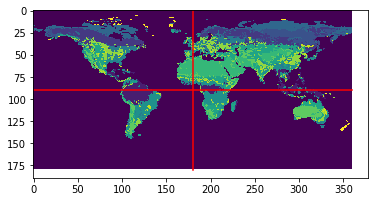

In [8]:
GLCF.draw()

### Country level features

Country level features have specific functionality that allow us to retrieve data for a specific year, but also allow a 'fuzzy' lookup - if data isn't available for a specific year, look in the past and in the future for a close-matching measure.

Several country-level datasets are impemented (retrieved from the LandPortal, or the World Bank.

They are provided in a uniform interface.

These datasets are also combined in the `jusipy.features.All` structure, with the same interface as the individual datasets.

In [1]:
# Country-level features
import jusipy

LMM_PICL = jusipy.features.LMM_PICL() # Percentage of indigenous and Communal lands
LMM_LISC = jusipy.features.LMM_LSIC() # Legal Security of Indigenous and Community Lands
TI_CPI   = jusipy.features.TI_CPI()   # Corruption Percention Index
WB_ARD   = jusipy.features.WB_ARD()   # Agricultural and Rural Development
WB_SPL   = jusipy.features.WB_SPL()   # Social Protection and Labor indicators
WB_SD    = jusipy.features.WB_SD()    # Social Development indicators
WB_LGAF  = jusipy.features.WB_LGAF()  # Land Governance and Assessment Framework
WB_SE    = jusipy.features.WB_SE()    # Socio-Economic Indicators
WB_LG    = jusipy.features.WB_LG()    # Land and Gender Indicators

A = jusipy.features.All([LMM_PICL, LMM_LISC, TI_CPI, WB_ARD, WB_SPL, WB_SD, WB_LGAF, WB_SE, WB_LG])

You can query these datasets with the `get` function, which allows you to ask for the newest available data for each indicator:

In [5]:
#A.get('DEU', year='newest') # Equivalent to ->
A.get('DEU')

,LMM_PICL__LMM_PICL_1TOT,LMM_PICL__LMM_PICL_2FR,LMM_PICL__LMM_PICL_3NFR,LMM_LSIC__LMM_LSIC_10CL,LMM_LSIC__LMM_LSIC_10IP,LMM_LSIC__LMM_LSIC_11AVCL,LMM_LSIC__LMM_LSIC_11AVIP,LMM_LSIC__LMM_LSIC_1CL,LMM_LSIC__LMM_LSIC_1IP,LMM_LSIC__LMM_LSIC_2CL,...,WB_LG__FAO_LG_2F,WB_LG__FAO_LG_2M,WB_LG__FAO_LG_3FA,WB_LG__FAO_LG_3FB,WB_LG__FAO_LG_3MA,WB_LG__FAO_LG_3MB,WB_LG__FAO_LG_4F,WB_LG__FAO_LG_4M,WB_LG__FAO_LG_5F,WB_LG__FAO_LG_5M
0,None,None,None,4.0,None,2.0,None,2.0,None,2.0,...,None,None,None,None,None,None,None,None,None,None


You can also query for multiple countries

In [4]:
TI_CPI.get(['DEU', 'GRC'])

[CountryFeatures(TI_CPI_CPIRN=12.0, TI_CPI_CPIRO=14.0, TI_CPI_CPISN=81.0, TI_CPI_CPISO=8.04614),
 CountryFeatures(TI_CPI_CPIRN=59.0, TI_CPI_CPIRO=80.0, TI_CPI_CPISN=48.0, TI_CPI_CPISO=3.3889699999999996)]

You can also specify a year with the `years=` argument

In [5]:
# TI_CPI.get(['DEU', 'GRC'], years=[2017, 2017]) # Is equivalent to ->
TI_CPI.get(['DEU', 'GRC'], years=2017)

[CountryFeatures(TI_CPI_CPIRN=12.0, TI_CPI_CPIRO=None, TI_CPI_CPISN=81.0, TI_CPI_CPISO=None),
 CountryFeatures(TI_CPI_CPIRN=59.0, TI_CPI_CPIRO=None, TI_CPI_CPISN=48.0, TI_CPI_CPISO=None)]

If there is no data available for a specific year, you can specify the number of years we should search around with the `fuzzy=` argument

In [9]:
TI_CPI.get(['DEU', 'GRC'], years=2017, fuzzy=5)

5
5


[CountryFeatures(TI_CPI_CPIRN=12.0, TI_CPI_CPIRO=14.0, TI_CPI_CPISN=81.0, TI_CPI_CPISO=8.04614),
 CountryFeatures(TI_CPI_CPIRN=59.0, TI_CPI_CPIRO=80.0, TI_CPI_CPISN=48.0, TI_CPI_CPISO=3.3889699999999996)]

You can also get a dataFrame as a result:

In [8]:
TI_CPI.get(['DEU', 'GRC'], years=2017, fuzzy=10, df=True)

10
10


,,TI_CPI_CPIRN,TI_CPI_CPIRO,TI_CPI_CPISN,TI_CPI_CPISO
country,year,,,,
DEU,2017,12.0,14.0,81.0,8.04614
GRC,2017,59.0,80.0,48.0,3.38897


## Collecting features for the deals

In [1]:
import jusipy
LM = jusipy.deals.LandMatrix()

In [9]:
import pandas as pd
def get_features(deal_pd, feature, fuzzy=None):
    countries = LM.M.target_country_iso3.values
    years     = [ str(int(y)) if not pd.isna(y) else 'newest' for y in LM.M.negotiation_year.values ]
    F = feature.get(countries, years, fuzzy=fuzzy, df=True)
    F['index'] = deal_pd.index
    return F.set_index('index')
#edef

def get_lat_long(deal_pd, gc):
    latlong = pd.DataFrame([ gc.address(l) for l in deal_pd.location ], columns=['lat', 'long'])
    latlong['index'] = deal_pd.index
    return latlong.set_index('index')
#edef

In [6]:
LMF = LM.M.join(get_lat_long(LM.M, gc)).join(get_features(LM.M, CPI, fuzzy=10))
LMF

NameError: name 'LM' is not defined

## Additional stuff

In [53]:
import statsmodels.api as sm

for feature in A:
    x = sm.OLS(A.n_deals.values, sm.add_constant(A[feature].values)).fit()
    if x.pvalues[-1] < 0.005:
        print(feature)
        print(x.params)
    #fi
#efor

FAO-LG.1FA
[9.63772899e+00 7.21835493e-06]
FAO-LG.1MA
[9.76921813e+00 9.76581323e-07]
FAO-LG.1MB
[5.82422457 0.15392442]
FAO-LG.1T
[9.74630439e+00 8.64166530e-07]
FAO-LG.3FA
[9.46736541 2.31714247]
FAO-LG.3FB
[9.06934711 0.89785691]
FAO-LG.3MB
[9.20480939 0.70344472]
FAO-LG.4F
[9.91171484 1.54078881]
FAO-LG.4M
[9.69792681 0.49240248]
SL.AGR.EMPL.ZS
[4.94216188 0.24354908]
SL.AGR.EMPL.MA.ZS
[4.26224841 0.26975841]
SL.AGR.EMPL.FE.ZS
[6.27396091 0.18675766]
SI.POV.RUHC
[7.64924641 0.21788107]
NV.AGR.TOTL.ZS
[5.17557072 0.56136508]
ER.H2O.FWAG.ZS
[2.60491241 0.18041478]
AG.PRD.FOOD.XD
[-12.86403159   0.20792823]
AG.PRD.CROP.XD
[-11.642988     0.19804835]
AG.LND.PRCP.MM
[3.62921448 0.00883636]
AG.LND.ARBL.HA.PC
[ 6.54570722 22.1840645 ]
AG.LND.ARBL.HA
[8.03583546e+00 5.03304762e-07]
SL.WAG.0714.ZS
[7.00637192 0.8583792 ]
SL.WAG.0714.MA.ZS
[6.67953099 0.87162876]
SL.WAG.0714.FE.ZS
[7.7963611 0.7481908]
SL.UEM.NEET.ZS
[6.00133387 0.42303637]
SL.TLF.TOTL.FE.ZS
[-2.55477615  0.37129323]
SL.TLF.

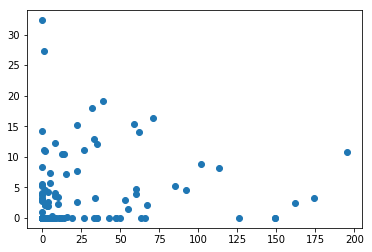

In [58]:
plt.scatter(A.n_deals, A['SL.SLF.0714.ZS'])

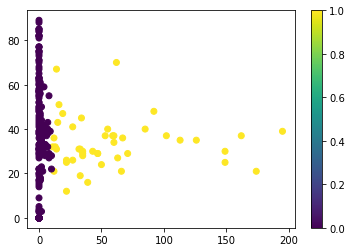

In [13]:
plt.scatter(*list(zip(*list(A[['n_deals', 'score']].values))), c=A.n_deals > 10)
plt.colorbar()

102 36.78333333333333
86 48.10383872093023


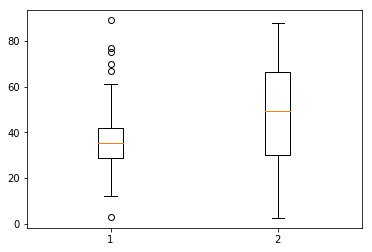

In [10]:
withLG = []
withoutLG = []
for ciso3 in CPI.countries_iso3:
    if ciso3 in set(GR.countries_iso3 + LM.countries_iso3):
        withLG.append(CPI.score(ciso3))
    else:
        withoutLG.append(CPI.score(ciso3))
    #fi
#efor
import numpy as np


plt.boxplot([withLG, withoutLG])
print(len(withLG), np.mean(withLG))
print(len(withoutLG), np.mean(withoutLG))

## Sample random points on earth that are ONLY on land

In [2]:
import jusipy
import matplotlib.pylab as plt

In [4]:
GLCF = jusipy.landcover.GLCF(resolution='8km')
LM   = jusipy.deals.LandMatrix

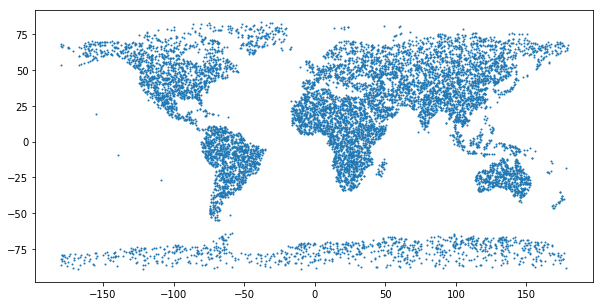

In [3]:
plt.figure(figsize=(10,5))
lat, long = list(zip(*jusipy.GIS.sample.random_latlong(land=True, 
                                                       glcf=GLCF, 
                                                       size=10000)))
plt.scatter(long, lat, s=1)